### 1.1 Introduction

- This article explains the functioning of Backpropagation algorithm and optimizer
- In a neural network, there are 3 types of layers
  - Input layer
  - Hidden layers
  - Output layer
- Generally, we have multiple hidden layers in neural network. Each layer consists of multiple neurons. There are weights associated with each neuron.
- For a fully connected layer, each neuron in the hidden layer has `n` number of weights associated with it. Where, `n` is the number of neurons in the previous layer
- For a convolutional layer, each kernel will have `length*width` number of weights associated with it.


### 1.2 Simple Neural Network

- To explain the backpropagation for convolutional neural network is a tedious job, hence in this article it is done for a simple neural network with 2 hidden layers and 1 input layer
- Following is the representation of the neural network

![](https://github.com/Shilpaj1994/ERA/blob/master/Session6/Data/image-20230605204246493.png?raw=true)

In the above architecture,

- `i1` and `i2` are the input neurons
- `h1` and `h2` are the placeholders for the values calculated based on the weights and input data
- `a_h1` and `a_h2` are the activations for `h1` and `h2`
- w1, w2, w3, and w4 are the weights for the first hidden layer
- `o1` and `o2` are the placeholders for the values calculated based on the weights and first hidden layer output data
- `a_o1` and `a_o2` are the activations for `o1` and `o2`
- w5, w6, w7, and w8 are the weights for the first hidden layer
- `t1` and `t2` are the target values for the output from `a_o1` and `a_o2`
- `E1` is the error value calculated using the target output and model output for `o1`
- `E2` is the error value calculated using the target output and model output for `o2`

In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Store network parameters in the dictionary
network_parameters = {
    't1': 0.50,
    't2': 0.50,

    'i1': 0.05,
    'i2': 0.10,

    'w1': 0.15,
    'w2': 0.20,
    'w3': 0.25,
    'w4': 0.30,
    'w5': 0.40,
    'w6': 0.45,
    'w7': 0.50,
    'w8': 0.55,

    'h1': None,
    'h2': None,
    'a_h1': None,
    'a_h2': None,

    'o1': None,
    'o2': None,
    'a_o1': None,
    'a_o2': None,

    'E1': None,
    'E2': None,
    'E_total': None,

    'E_total_w1': None,
    'E_total_w2': None,
    'E_total_w3': None,
    'E_total_w4': None,
    'E_total_w5': None,
    'E_total_w6': None,
    'E_total_w7': None,
    'E_total_w8': None,
}

In [3]:
# Set values to parameters
i1 = network_parameters['i1']
i2 = network_parameters['i2']

w1 = network_parameters['w1']
w2 = network_parameters['w2']
w3 = network_parameters['w3']
w4 = network_parameters['w4']
w5 = network_parameters['w5']
w6 = network_parameters['w6']
w7 = network_parameters['w7']
w8 = network_parameters['w8']

t1 = network_parameters['t1']
t2 = network_parameters['t2']

def sigma(x):
    return 1.0 / (1.0 + math.exp(-x))

## Update Neurons

In [4]:
def update_neurons():
    """
    Function to update the values associated with the neurons
    """
    w1 = network_parameters['w1']
    w2 = network_parameters['w2']
    w3 = network_parameters['w3']
    w4 = network_parameters['w4']
    w5 = network_parameters['w5']
    w6 = network_parameters['w6']
    w7 = network_parameters['w7']
    w8 = network_parameters['w8']

    h1 = w1 * i1 + w2 * i2
    a_h1 = sigma(h1)

    h2 = w3 * i1 + w4 * i2
    a_h2 = sigma(h2)

    o1 = w5 * a_h1 + w6 * a_h2
    a_o1 = sigma(o1)

    o2 = w7 * a_h1 + w8 * a_h2
    a_o2 = sigma(o2)

    E1 = 0.5 * (t1 - a_o1)**2
    E2 = 0.5 * (t2 - a_o2)**2
    E_total = E1 + E2

    network_parameters['h1'] = h1
    network_parameters['a_h1'] = a_h1
    network_parameters['h2'] = h2
    network_parameters['a_h2'] = a_h2

    network_parameters['o1'] = o1
    network_parameters['a_o1'] = a_o1
    network_parameters['o2'] = o2
    network_parameters['a_o2'] = a_o2

    network_parameters['E1'] = E1
    network_parameters['E2'] = E2
    network_parameters['E_total'] = E_total

# update_neurons()
# df = pd.DataFrame(network_parameters, index=[0])
# df

## Update Gradients

In [5]:
def update_gradients():
    """
    Function to update the gradients
    """
    h1 = network_parameters['h1']
    a_h1 = network_parameters['a_h1']
    h2 = network_parameters['h2']
    a_h2 = network_parameters['a_h2']
    o1 = network_parameters['o1']
    a_o1 = network_parameters['a_o1']
    o2 = network_parameters['o2']
    a_o2 = network_parameters['a_o2']
    E1 = network_parameters['E1']
    E2 = network_parameters['E2']
    E_total = network_parameters['E_total']

    E_total_w1 = ((a_o1 - t1) * a_o1 * (1 - a_o1) * w5 +  (a_o2 - t2) * a_o2 * (1 - a_o2) * w7) * a_h1 * (1 - a_h1) * i1
    E_total_w2 = ((a_o1 - t1) * a_o1 * (1 - a_o1) * w5 +  (a_o2 - t2) * a_o2 * (1 - a_o2) * w7) * a_h1 * (1 - a_h1) * i2
    E_total_w3 = ((a_o1 - t1) * a_o1 * (1 - a_o1) * w6 +  (a_o2 - t2) * a_o2 * (1 - a_o2) * w8) * a_h2 * (1 - a_h2) * i1
    E_total_w4 = ((a_o1 - t1) * a_o1 * (1 - a_o1) * w6 +  (a_o2 - t2) * a_o2 * (1 - a_o2) * w8) * a_h2 * (1 - a_h2) * i2
    E_total_w5 = (a_o1 - t1) * a_o1 * (1 - a_o1) *  a_h1
    E_total_w6 = (a_o1 - t1) * a_o1 * (1 - a_o1) *  a_h2
    E_total_w7 = (a_o2 - t2) * a_o2 * (1 - a_o2) *  a_h1
    E_total_w8 = (a_o2 - t2) * a_o2 * (1 - a_o2) *  a_h2

    network_parameters['E_total_w1'] = E_total_w1
    network_parameters['E_total_w2'] = E_total_w2
    network_parameters['E_total_w3'] = E_total_w3
    network_parameters['E_total_w4'] = E_total_w4
    network_parameters['E_total_w5'] = E_total_w5
    network_parameters['E_total_w6'] = E_total_w6
    network_parameters['E_total_w7'] = E_total_w7
    network_parameters['E_total_w8'] = E_total_w8

# update_gradients()
# df = pd.DataFrame(network_parameters, index=[0])
# df

## Weight Update

In [6]:
def update_weights(lr):
    """
    Function to update the weight
    w1(updated) = w1 - (lr*gradient of x1)
    :parma lr: Learning Rate
    """
    w1 = network_parameters['w1'] - (lr * network_parameters['E_total_w1'])
    w2 = network_parameters['w2'] - (lr * network_parameters['E_total_w2'])
    w3 = network_parameters['w3'] - (lr * network_parameters['E_total_w3'])
    w4 = network_parameters['w4'] - (lr * network_parameters['E_total_w4'])
    w5 = network_parameters['w5'] - (lr * network_parameters['E_total_w5'])
    w6 = network_parameters['w6'] - (lr * network_parameters['E_total_w6'])
    w7 = network_parameters['w7'] - (lr * network_parameters['E_total_w7'])
    w8 = network_parameters['w8'] - (lr * network_parameters['E_total_w8'])

    network_parameters['w1'] = w1
    network_parameters['w2'] = w2
    network_parameters['w3'] = w3
    network_parameters['w4'] = w4
    network_parameters['w5'] = w5
    network_parameters['w6'] = w6
    network_parameters['w7'] = w7
    network_parameters['w8'] = w8

## BackPropagation

In [7]:
def backpropagation(epochs: int, learning_rate: float, network_params):
    """
    Function to perform back propagation
    :param epochs: Number of Epochs for which model should be trained
    :param learning_rate: Learning rate for training
    :param network_params: Dict of network parameters
    """
    df = pd.DataFrame(network_params, index=[0])

    for i in range(1, epochs+1):
        update_neurons()
        update_gradients()
        update_weights(learning_rate)
        df.loc[i] = network_parameters

    print(df)

    plt.plot(df["E_total"].tolist())
    plt.ylabel('Total Loss')
    plt.xlabel('Epochs')
    plt.title("Loss over Epochs")
    plt.show()

### BackPropagation with Learning Rate=0.1

     t1   t2    i1   i2        w1        w2        w3        w4        w5  \
0   0.5  0.5  0.05  0.1  0.150000  0.200000  0.250000  0.300000  0.400000   
1   0.5  0.5  0.05  0.1  0.149968  0.199937  0.249965  0.299930  0.398712   
2   0.5  0.5  0.05  0.1  0.149937  0.199873  0.249930  0.299859  0.397427   
3   0.5  0.5  0.05  0.1  0.149905  0.199810  0.249895  0.299789  0.396146   
4   0.5  0.5  0.05  0.1  0.149874  0.199747  0.249860  0.299720  0.394868   
5   0.5  0.5  0.05  0.1  0.149842  0.199685  0.249825  0.299650  0.393594   
6   0.5  0.5  0.05  0.1  0.149811  0.199622  0.249790  0.299581  0.392323   
7   0.5  0.5  0.05  0.1  0.149780  0.199560  0.249756  0.299511  0.391056   
8   0.5  0.5  0.05  0.1  0.149749  0.199497  0.249721  0.299442  0.389792   
9   0.5  0.5  0.05  0.1  0.149718  0.199435  0.249687  0.299373  0.388531   
10  0.5  0.5  0.05  0.1  0.149687  0.199373  0.249652  0.299304  0.387274   

          w6  ...        E2   E_total  E_total_w1  E_total_w2  E_total_w3  

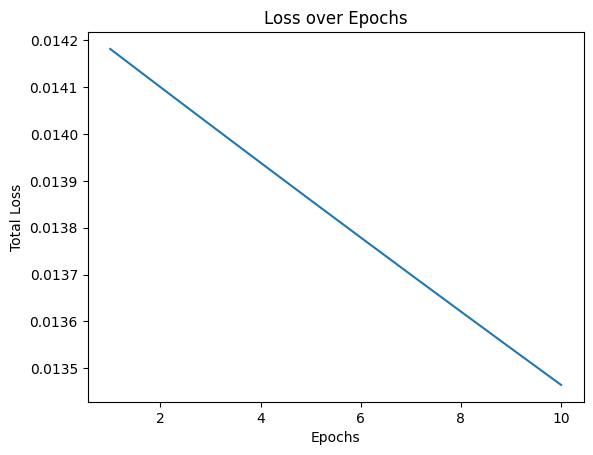

In [8]:
backpropagation(epochs=10, learning_rate=0.1, network_params=network_parameters)

### BackPropagation with Learning Rate=0.2

     t1   t2    i1   i2        w1        w2        w3        w4        w5  \
0   0.5  0.5  0.05  0.1  0.149687  0.199373  0.249652  0.299304  0.387274   
1   0.5  0.5  0.05  0.1  0.149625  0.199250  0.249584  0.299167  0.384766   
2   0.5  0.5  0.05  0.1  0.149563  0.199127  0.249515  0.299031  0.382272   
3   0.5  0.5  0.05  0.1  0.149502  0.199004  0.249447  0.298895  0.379792   
4   0.5  0.5  0.05  0.1  0.149441  0.198882  0.249380  0.298760  0.377325   
5   0.5  0.5  0.05  0.1  0.149381  0.198761  0.249313  0.298625  0.374871   
6   0.5  0.5  0.05  0.1  0.149320  0.198641  0.249246  0.298492  0.372431   
7   0.5  0.5  0.05  0.1  0.149260  0.198521  0.249179  0.298359  0.370004   
8   0.5  0.5  0.05  0.1  0.149201  0.198402  0.249113  0.298226  0.367591   
9   0.5  0.5  0.05  0.1  0.149142  0.198283  0.249047  0.298095  0.365190   
10  0.5  0.5  0.05  0.1  0.149083  0.198165  0.248982  0.297964  0.362804   

          w6  ...        E2   E_total  E_total_w1  E_total_w2  E_total_w3  

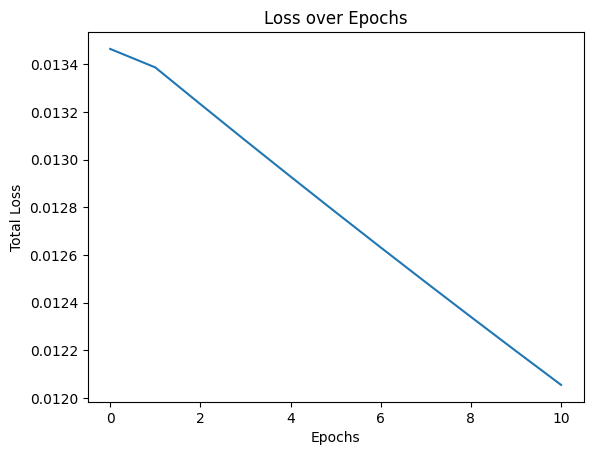

In [9]:
backpropagation(epochs=10, learning_rate=0.2, network_params=network_parameters)

### BackPropagation with Learning Rate=0.5

     t1   t2    i1   i2        w1        w2        w3        w4        w5  \
0   0.5  0.5  0.05  0.1  0.149083  0.198165  0.248982  0.297964  0.362804   
1   0.5  0.5  0.05  0.1  0.148936  0.197872  0.248819  0.297638  0.356869   
2   0.5  0.5  0.05  0.1  0.148791  0.197582  0.248658  0.297317  0.351017   
3   0.5  0.5  0.05  0.1  0.148648  0.197296  0.248500  0.297000  0.345246   
4   0.5  0.5  0.05  0.1  0.148507  0.197014  0.248343  0.296687  0.339557   
5   0.5  0.5  0.05  0.1  0.148368  0.196736  0.248189  0.296378  0.333947   
6   0.5  0.5  0.05  0.1  0.148231  0.196462  0.248037  0.296074  0.328416   
7   0.5  0.5  0.05  0.1  0.148096  0.196191  0.247887  0.295773  0.322964   
8   0.5  0.5  0.05  0.1  0.147962  0.195924  0.247738  0.295477  0.317589   
9   0.5  0.5  0.05  0.1  0.147830  0.195661  0.247592  0.295185  0.312291   
10  0.5  0.5  0.05  0.1  0.147700  0.195401  0.247448  0.294896  0.307069   

          w6  ...        E2   E_total  E_total_w1  E_total_w2  E_total_w3  

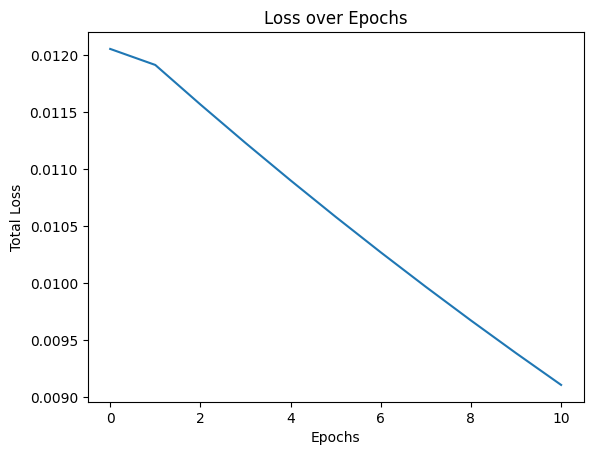

In [10]:
backpropagation(epochs=10, learning_rate=0.5, network_params=network_parameters)

### BackPropagation with Learning Rate=1

     t1   t2    i1   i2        w1        w2        w3        w4        w5  \
0   0.5  0.5  0.05  0.1  0.147700  0.195401  0.247448  0.294896  0.307069   
1   0.5  0.5  0.05  0.1  0.147444  0.194889  0.247164  0.294328  0.296776   
2   0.5  0.5  0.05  0.1  0.147195  0.194391  0.246888  0.293775  0.286781   
3   0.5  0.5  0.05  0.1  0.146953  0.193906  0.246619  0.293238  0.277077   
4   0.5  0.5  0.05  0.1  0.146718  0.193436  0.246358  0.292716  0.267658   
5   0.5  0.5  0.05  0.1  0.146490  0.192979  0.246105  0.292209  0.258517   
6   0.5  0.5  0.05  0.1  0.146268  0.192536  0.245859  0.291717  0.249648   
7   0.5  0.5  0.05  0.1  0.146052  0.192105  0.245620  0.291239  0.241044   
8   0.5  0.5  0.05  0.1  0.145843  0.191687  0.245388  0.290775  0.232697   
9   0.5  0.5  0.05  0.1  0.145640  0.191281  0.245162  0.290325  0.224602   
10  0.5  0.5  0.05  0.1  0.145443  0.190887  0.244944  0.289887  0.216753   

          w6  ...        E2   E_total  E_total_w1  E_total_w2  E_total_w3  

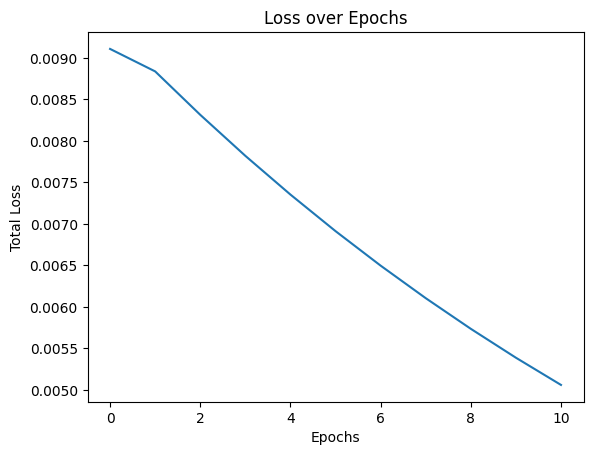

In [11]:
backpropagation(epochs=10, learning_rate=1, network_params=network_parameters)

### BackPropagation with Learning Rate=10

     t1   t2    i1   i2        w1        w2        w3        w4        w5  \
0   0.5  0.5  0.05  0.1  0.145443  0.190887  0.244944  0.289887  0.216753   
1   0.5  0.5  0.05  0.1  0.143532  0.187064  0.242823  0.285646  0.140642   
2   0.5  0.5  0.05  0.1  0.142204  0.184408  0.241350  0.282699  0.088108   
3   0.5  0.5  0.05  0.1  0.141293  0.182586  0.240339  0.280678  0.052217   
4   0.5  0.5  0.05  0.1  0.140673  0.181346  0.239651  0.279302  0.027813   
5   0.5  0.5  0.05  0.1  0.140252  0.180504  0.239184  0.278368  0.011257   
6   0.5  0.5  0.05  0.1  0.139966  0.179933  0.238867  0.277734  0.000034   
7   0.5  0.5  0.05  0.1  0.139773  0.179546  0.238652  0.277305 -0.007569   
8   0.5  0.5  0.05  0.1  0.139642  0.179284  0.238507  0.277014 -0.012719   
9   0.5  0.5  0.05  0.1  0.139553  0.179106  0.238409  0.276817 -0.016208   
10  0.5  0.5  0.05  0.1  0.139493  0.178986  0.238342  0.276684 -0.018571   

          w6  ...        E2   E_total  E_total_w1  E_total_w2  E_total_w3  

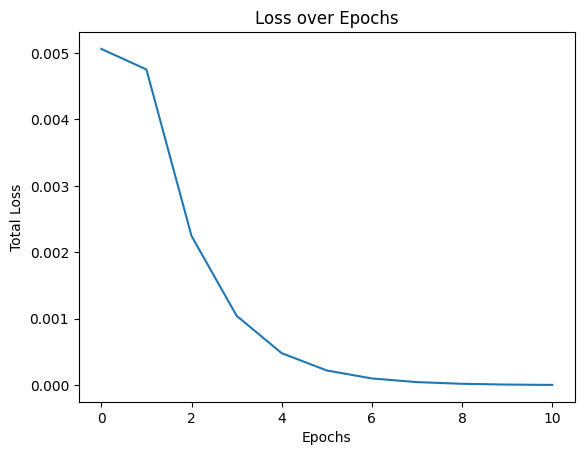

In [12]:
backpropagation(epochs=10, learning_rate=10, network_params=network_parameters)

### BackPropagation with Learning Rate=100

     t1   t2    i1   i2        w1        w2        w3        w4        w5  \
0   0.5  0.5  0.05  0.1  0.139493  0.178986  0.238342  0.276684 -0.018571   
1   0.5  0.5  0.05  0.1  0.139085  0.178171  0.237890  0.275780 -0.034577   
2   0.5  0.5  0.05  0.1  0.139992  0.179985  0.238896  0.277792  0.001056   
3   0.5  0.5  0.05  0.1  0.137974  0.175947  0.236656  0.273313 -0.078271   
4   0.5  0.5  0.05  0.1  0.142462  0.184923  0.241635  0.283271  0.098100   
5   0.5  0.5  0.05  0.1  0.132545  0.165089  0.230633  0.261266 -0.292632   
6   0.5  0.5  0.05  0.1  0.153824  0.207648  0.254244  0.308488  0.552764   
7   0.5  0.5  0.05  0.1  0.113578  0.127155  0.209575  0.219150 -1.112655   
8   0.5  0.5  0.05  0.1  0.167052  0.234104  0.268973  0.337947  1.257605   
9   0.5  0.5  0.05  0.1  0.113076  0.126153  0.209017  0.218034 -1.186173   
10  0.5  0.5  0.05  0.1  0.166918  0.233835  0.268827  0.337655  1.218439   

          w6  ...        E2   E_total  E_total_w1  E_total_w2  E_total_w3  

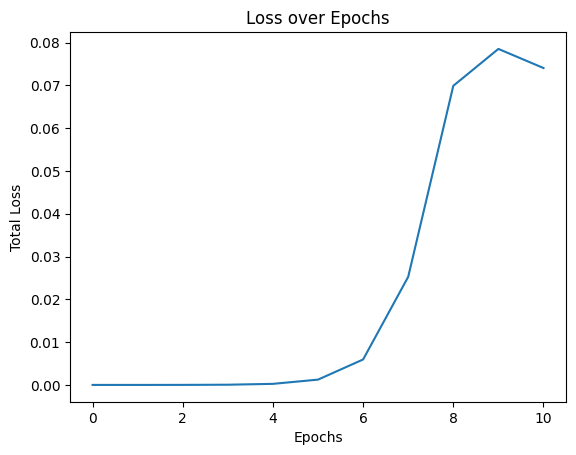

In [13]:
backpropagation(epochs=10, learning_rate=100, network_params=network_parameters)